Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2387 - loss: 1.6261 - val_accuracy: 0.2450 - val_loss: 1.4393 - learning_rate: 0.0010
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2879 - loss: 1.4465 - val_accuracy: 0.2900 - val_loss: 1.3750 - learning_rate: 0.0010
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2946 - loss: 1.3794 - val_accuracy: 0.3525 - val_loss: 1.3319 - learning_rate: 0.0010
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3691 - loss: 1.3404 - val_accuracy: 0.4325 - val_loss: 1.2839 - learning_rate: 0.0010
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4027 - loss: 1.3040 - val_accuracy: 0.4900 - val_loss: 1.2119 - learning_rate: 0.0010
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4387 - loss: 1.2285 - val_accuracy: 0.5300 - val_loss: 1.1215 - learning_rate: 0.0010
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4662 - loss: 1.1569 - val_accuracy: 0.5925 - v

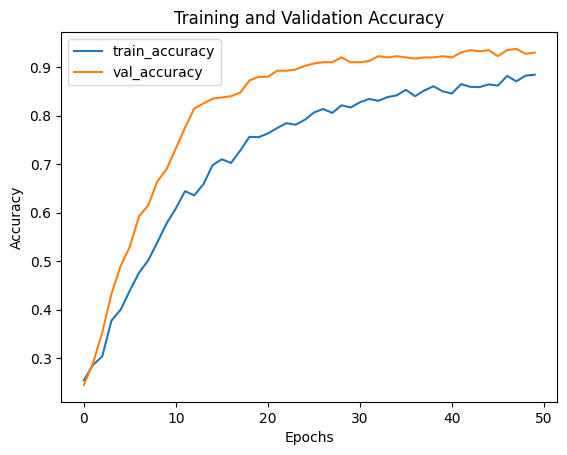

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


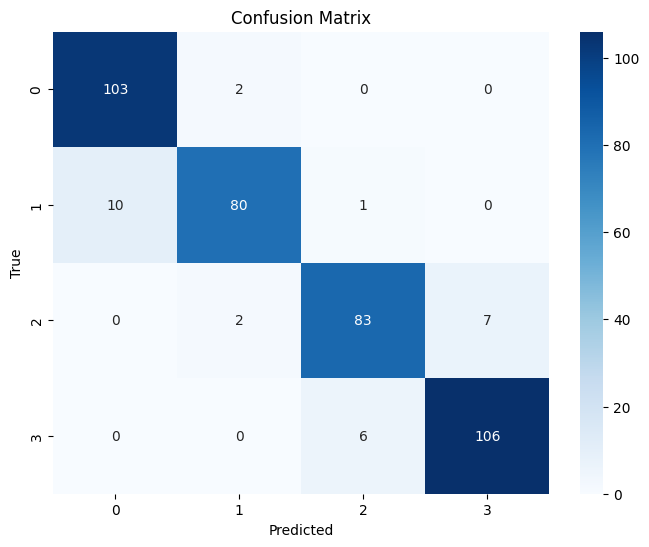

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       105
           1       0.95      0.88      0.91        91
           2       0.92      0.90      0.91        92
           3       0.94      0.95      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [18]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model, to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

X = train_data.drop('price_range', axis=1).values
y = train_data['price_range'].values

y = to_categorical(y, num_classes=4)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_test = scaler.transform(test_data.values[:, :20])

model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32,
                    callbacks=[early_stop, lr_scheduler])

plot_model(model, show_shapes=True, show_layer_names=True)

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.2f}")

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_val_true_classes, y_val_pred_classes))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2796 - loss: 1.4427 - val_accuracy: 0.3775 - val_loss: 1.3339
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3606 - loss: 1.3296 - val_accuracy: 0.4250 - val_loss: 1.2515
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4534 - loss: 1.2269 - val_accuracy: 0.5050 - val_loss: 1.1587
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5085 - loss: 1.1415 - val_accuracy: 0.5675 - val_loss: 1.0482
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5669 - loss: 1.0149 - val_accuracy: 0.6025 - val_loss: 0.9342
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6312 - loss: 0.9050 - val_accuracy: 0.6450 - val_loss: 0.8277
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6776 - loss: 0.7938 - val_accuracy: 0.6850 - val_loss: 0.7327
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7289 - loss: 0.6928 - val_accuracy: 0.7375 - val_loss: 0.6555
Ep

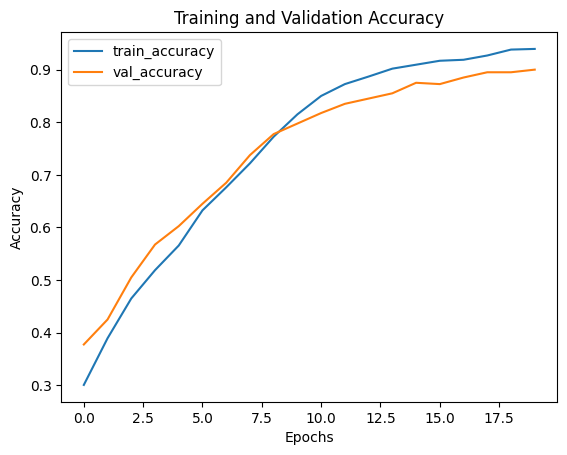

In [19]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model, to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load train and test data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Separate features and target in training data
X = train_data.drop('price_range', axis=1).values
y = train_data['price_range'].values

# Convert target labels to categorical (one-hot encoding)
y = to_categorical(y, num_classes=4)

# Split the training data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(test_data.values[:, :20])

# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))  # First hidden layer with 16 nodes
model.add(Dense(12, activation='relu'))                # Second hidden layer with 12 nodes
model.add(Dense(4, activation='softmax'))              # Output layer with 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Plot model structure with layer details
plot_model(model, show_shapes=True, show_layer_names=True)

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()
